# Hill Climbing

---

In this notebook, we will train hill climbing with adaptive noise scaling with OpenAI Gym's Cartpole environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Define the Environment and the Policy

In [2]:
env = gym.make('CartPole-v0')
env.seed(69)
np.random.seed(69)
print('observation space:', env.observation_space)
print('action space:', env.action_space)



observation space: Box(4,)
action space: Discrete(2)


In [9]:
class Policy:
    def __init__(self, state_size=4, action_size=2):
        self.state_size, self.action_size = state_size, action_size
        self.weight = 1e-4 * np.random.rand(state_size, action_size)

    def forward(self, state):
        x = state @ self.weight
        logits = np.exp(x)
        return logits / sum(logits)

    def act(self, state, random=False):
        probs = self.forward(state)
        action = np.argmax(probs) if not random else np.random.choice(self.action_size, p=probs)
        return action
    

### 3. Train the Agent with Stochastic Policy Search

In [20]:
policy = Policy()

def hill_climbing(num_episodes=1000, num_steps=1000, gamma=1, sigma=1e-2):
    scores_deque = deque(maxlen=100)
    scores = []

    best_G = -np.inf
    best_weight = policy.weight
    for i_episode in range(1, num_episodes):
        rewards = []
        state = env.reset()
        for t in range(num_steps):
            action = policy.act(state)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done: break
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        
        discounts = [gamma ** i for i in range(len(rewards))]
        G = sum([a*b for a, b in zip(discounts, rewards)])

        if G >= best_G:
            best_G = G
            best_weight = policy.weight
            noise_scale = max(1e-3, sigma/2)
            policy.weight += noise_scale * np.random.rand(*policy.weight.shape)
        
        else:
            noise_scale = min(2, noise_scale*2)
            policy.weight = best_weight + noise_scale * np.random.rand(*policy.weight.shape)

        if i_episode % 100 == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            policy.weight = best_weight
            break
        
    return scores

### 4. Plot the Scores

Episode 100	Average Score: 168.15
Environment solved in 16 episodes!	Average Score: 196.18


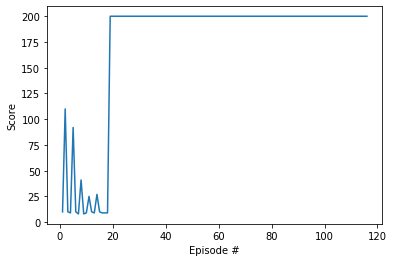

In [21]:
scores = hill_climbing()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!